# Raw Data vs PCA

**Index**:
- [Ensembles](#Ensembles)
    - [Preprocessing](#preprocessing-of-the-ensemble-results)
    - [Analysis of the results](#Analysis-of-the-ensemble-results)
        - [General plots](#General-plots-for-the-ensemble-results)
        - [Plots per class](#Plots-for-the-ensemble-results-per-class)
        - [General table](#General-table-for-the-ensemble-results)
        - [Table per class](#Tables-per-class-for-the-ensemble-results)

In [142]:
using Serialization
using DataStructures

In [143]:
include("plotting.jl")

generateComparisonTable (generic function with 2 methods)

## Preprocessing of the ensemble results

Load the results of first approach:

In [144]:
results_folder = "results/"
filename_1 = results_folder * "1_ensemble_results.jl"

# Load the results
approach1_obj = open(filename_1, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.940724, 0.75, 0.74718…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.942081, 0.795529, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.924434, 0.76338, 0.76…

The same for the second approach:

In [145]:
filename_2 = results_folder * "3_ensemble_results.jl"

# Load the results
approach2_obj = open(filename_2, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.893665, 0.714789, 0.6…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.915837, 0.749296, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.90724, 0.809859, 0.81…

Now, let's put in the same object the results of both approaches:

In [146]:
loaded_obj = OrderedDict(
    :Voting_Soft_Raw => approach1_obj[:Voting_Soft],
    :Voting_Soft_Balancing => approach2_obj[:Voting_Soft],
    :Voting_Hard_Raw => approach1_obj[:Voting_Hard],
    :Voting_Hard_Balancing => approach2_obj[:Voting_Hard],
    :Stacking_Raw => approach1_obj[:Stacking],
    :Stacking_Balancing => approach2_obj[:Stacking],
)

OrderedDict{Symbol, Dict{String, Any}} with 6 entries:
  :Voting_Soft_Raw       => Dict("class_results"=>[Dict(:recall=>[0.942081, 0.7…
  :Voting_Soft_Balancing => Dict("class_results"=>[Dict(:recall=>[0.915837, 0.7…
  :Voting_Hard_Raw       => Dict("class_results"=>[Dict(:recall=>[0.940724, 0.7…
  :Voting_Hard_Balancing => Dict("class_results"=>[Dict(:recall=>[0.893665, 0.7…
  :Stacking_Raw          => Dict("class_results"=>[Dict(:recall=>[0.924434, 0.7…
  :Stacking_Balancing    => Dict("class_results"=>[Dict(:recall=>[0.90724, 0.80…

In [147]:
model_names, metrics, metric_means, metric_stds, metric_means_class, metric_stds_class, metric_maxes, metric_maxes_class = aggregateMetrics(loaded_obj, 3, ensemble=true)
plots_output_dir = "./plots/Comparison_1_3/"
tables_output_dir = "./tables/Comparison_1_3/"

"./tables/Comparison_1_3/"

## Analysis of the ensemble results

### General plots for the ensemble results

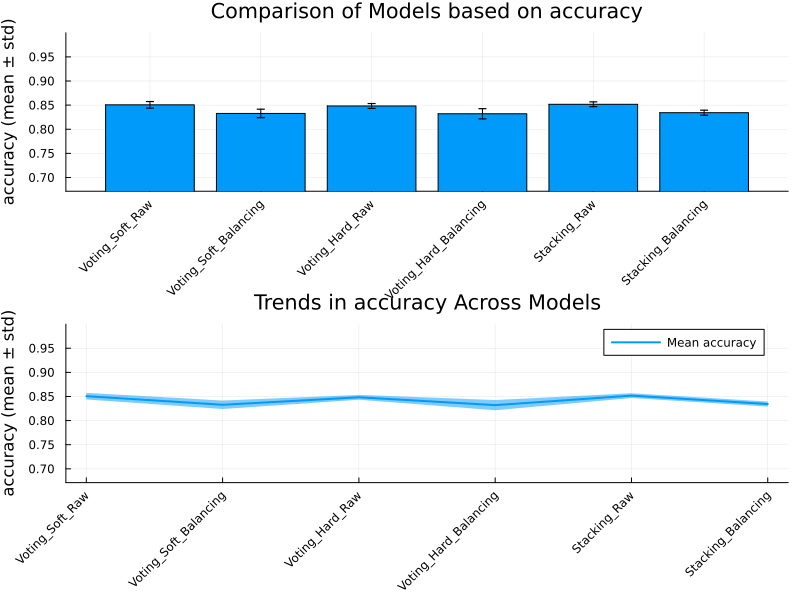

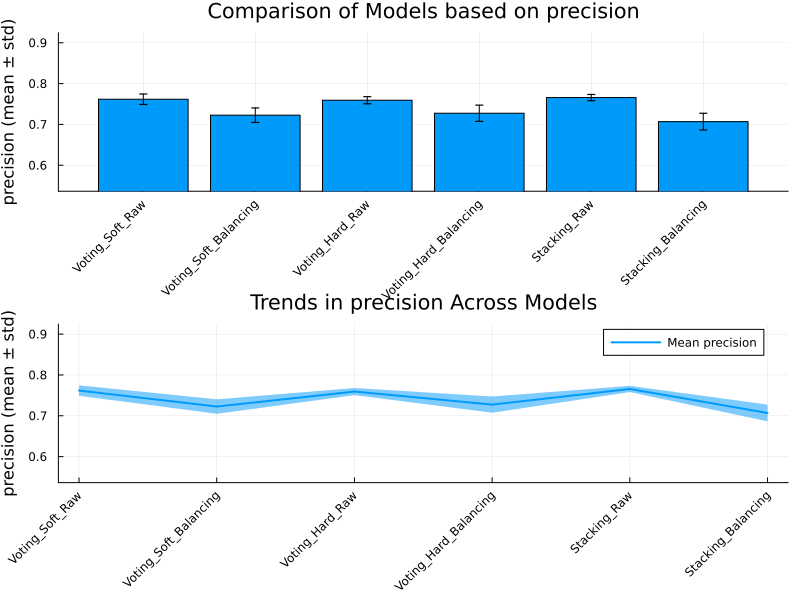

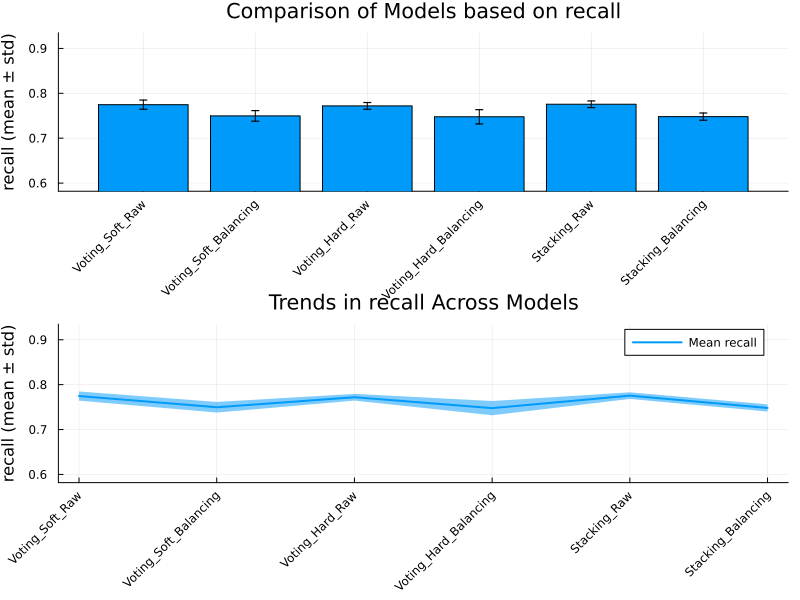

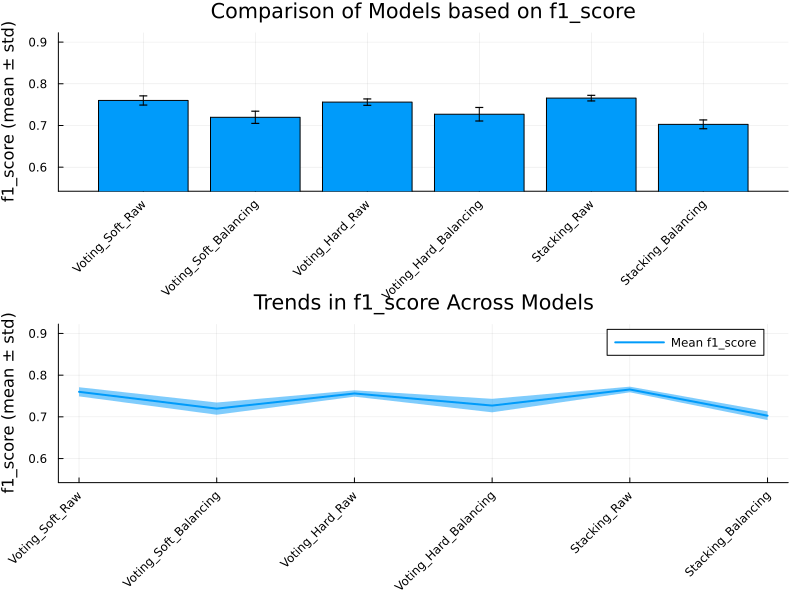

In [148]:
plotCombinedMetrics(model_names, metrics, metric_means, metric_stds, output_dir=plots_output_dir*"ensembles", show=true, rotate_xticks=true)

### Plots per class for the ensemble results

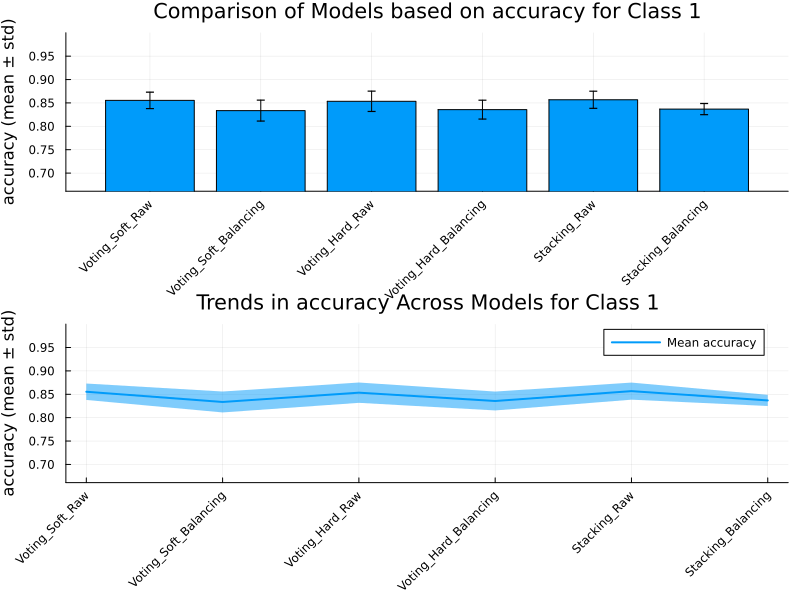

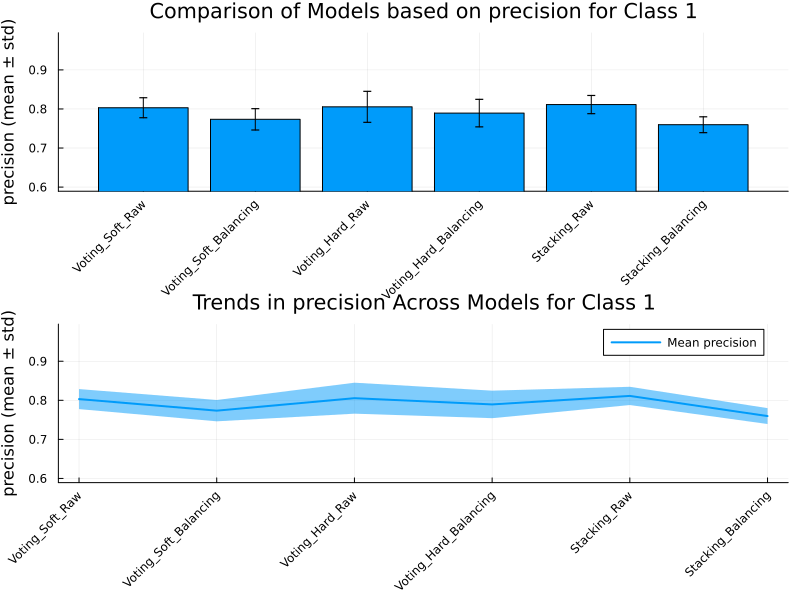

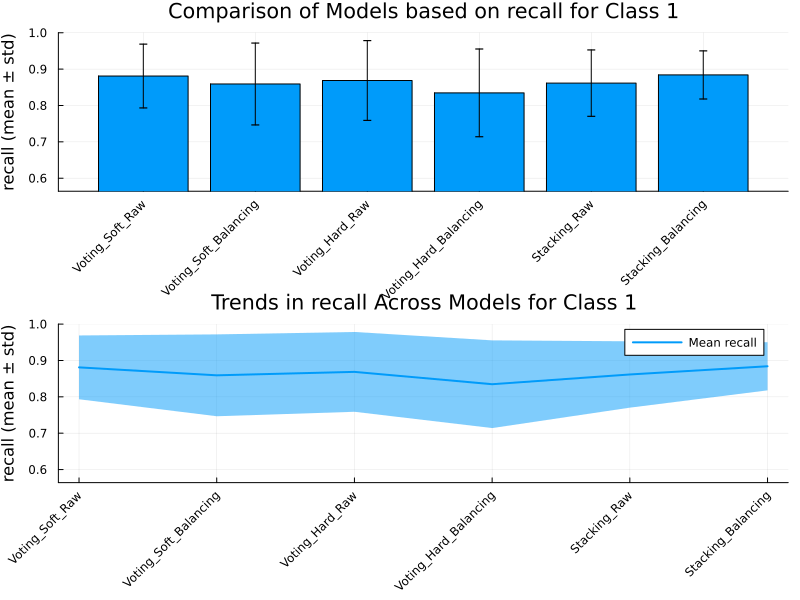

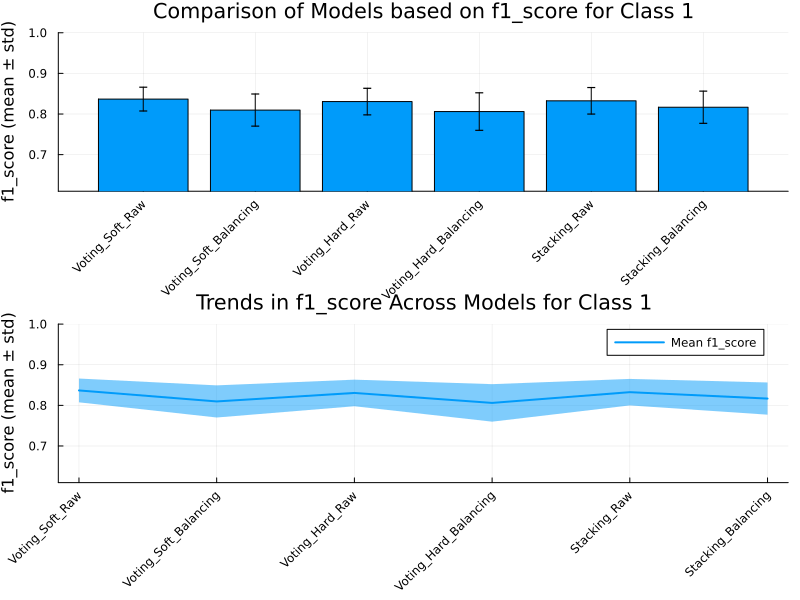

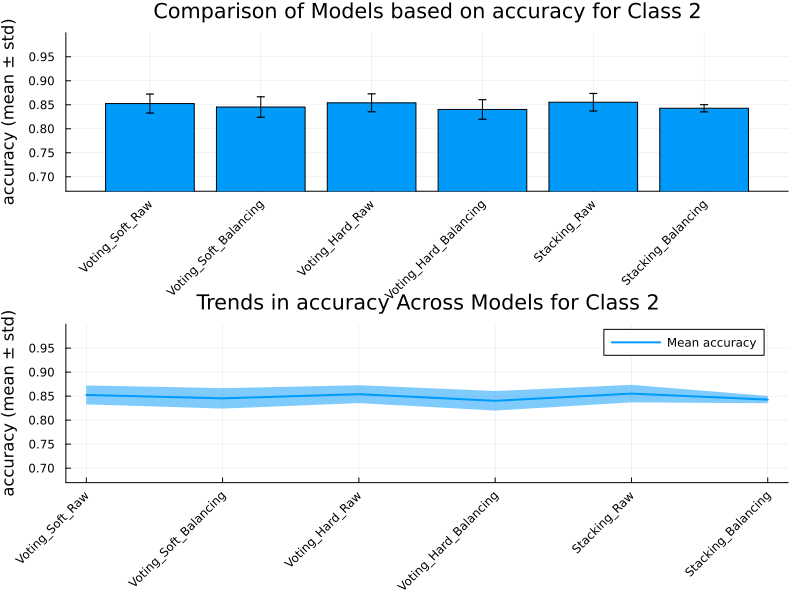

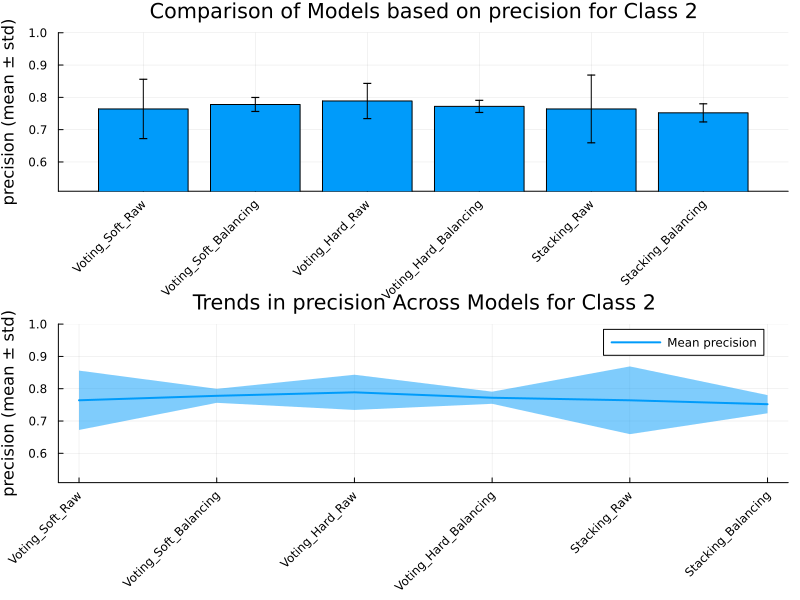

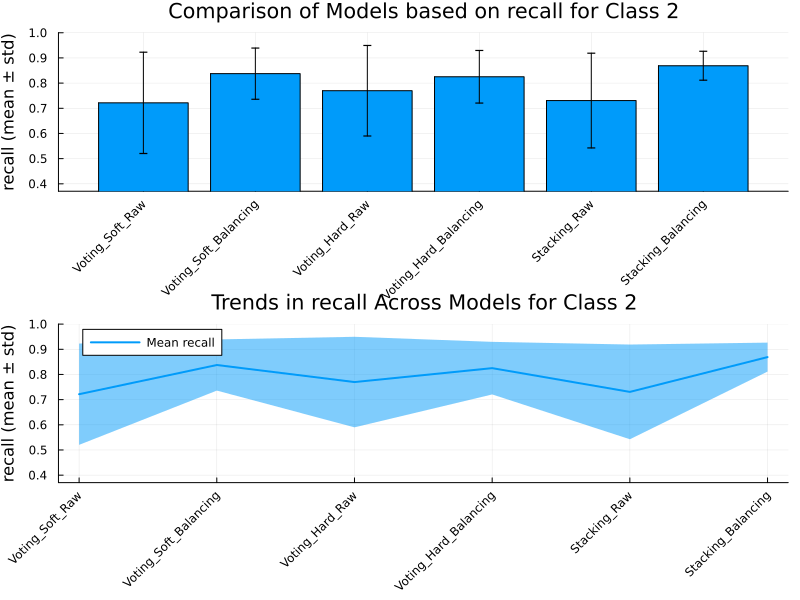

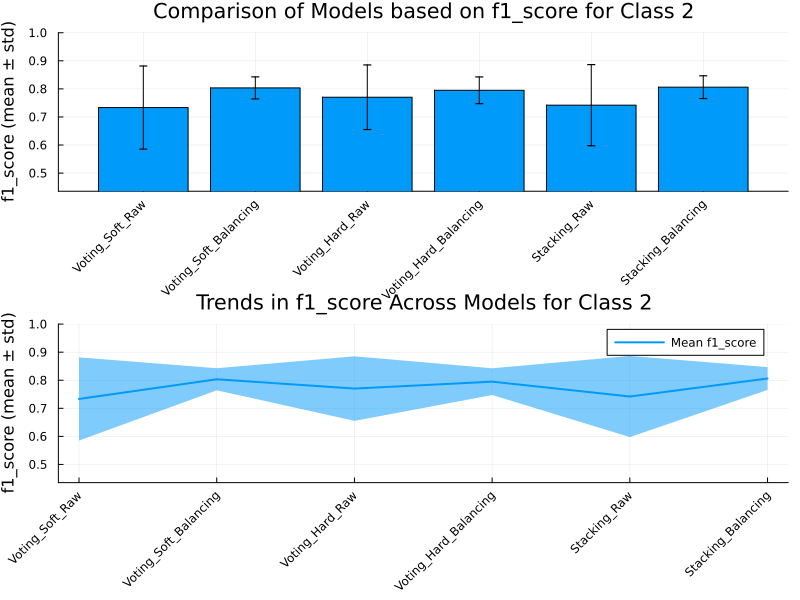

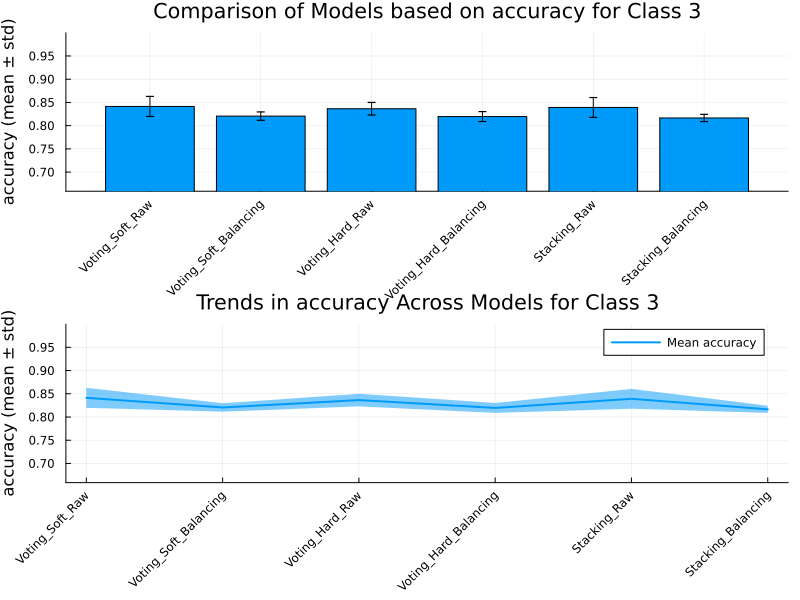

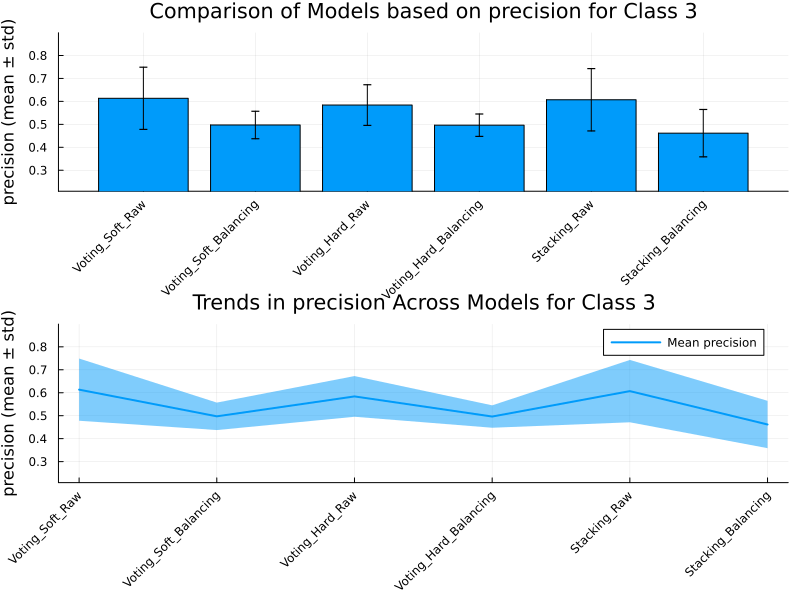

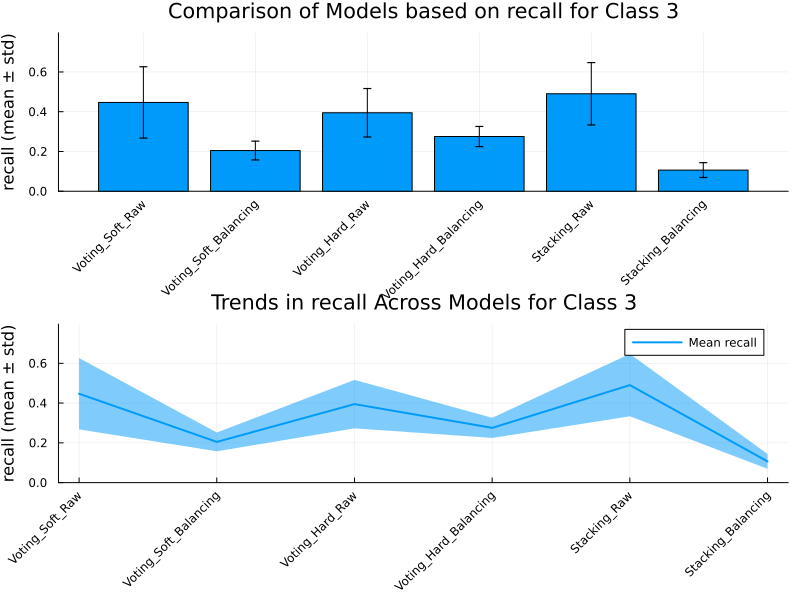

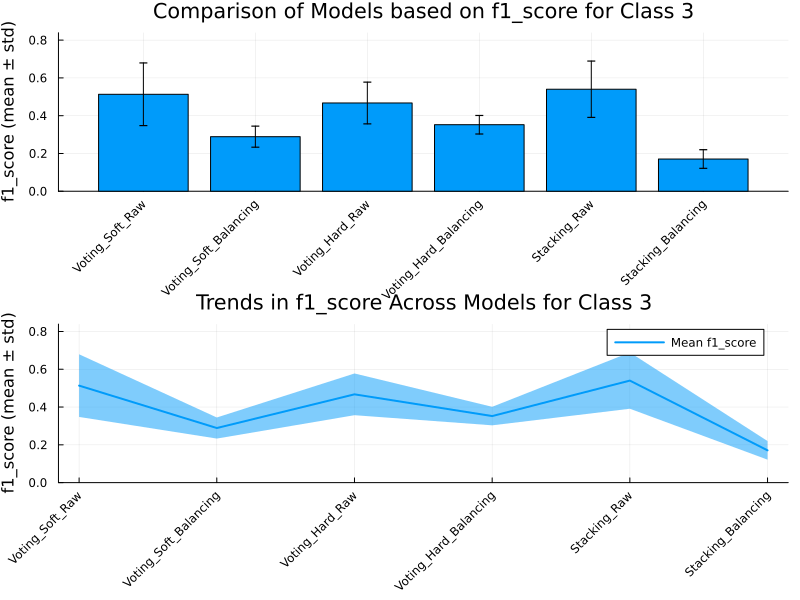

In [149]:
plotCombinedMetrics(model_names, 3, metrics, metric_means_class, metric_stds_class, output_dir=plots_output_dir*"ensembles/class", show=true, rotate_xticks=true)

### General table for the ensemble results

In [150]:
generateComparisonTable(model_names, metrics, metric_maxes; output_dir=tables_output_dir*"ensembles", sort_by=:f1_score, rev=true)


Comparison of Metrics Across Models (Sorted by f1_score):
┌───────────────────────┬──────────┬───────────┬────────┬──────────┐
│                 Model │ Accuracy │ Precision │ Recall │ F1-Score │
├───────────────────────┼──────────┼───────────┼────────┼──────────┤
│          Stacking_Raw │    0.859 │     0.777 │  0.787 │    0.776 │
│       Voting_Soft_Raw │    0.859 │     0.779 │  0.788 │    0.774 │
│       Voting_Hard_Raw │    0.855 │      0.77 │  0.781 │    0.764 │
│ Voting_Hard_Balancing │    0.848 │      0.76 │  0.771 │    0.754 │
│ Voting_Soft_Balancing │    0.847 │      0.75 │  0.769 │    0.745 │
│    Stacking_Balancing │    0.838 │     0.732 │  0.755 │    0.719 │
└───────────────────────┴──────────┴───────────┴────────┴──────────┘


### Tables per class for the ensemble results

In [151]:
generateComparisonTable(model_names, 3, metrics, metric_maxes_class; output_dir =tables_output_dir*"ensembles/class", sort_by=:f1_score, rev=true)


Comparison of Metrics Across Models for Class 1 (Sorted by f1_score):
┌───────────────────────┬──────────┬───────────┬────────┬──────────┐
│                 Model │ Accuracy │ Precision │ Recall │ F1-Score │
├───────────────────────┼──────────┼───────────┼────────┼──────────┤
│       Voting_Soft_Raw │    0.874 │     0.838 │  0.954 │    0.865 │
│          Stacking_Raw │    0.876 │     0.837 │  0.941 │    0.865 │
│       Voting_Hard_Raw │    0.876 │     0.849 │  0.957 │    0.863 │
│    Stacking_Balancing │    0.853 │     0.775 │  0.945 │     0.85 │
│ Voting_Soft_Balancing │    0.864 │     0.812 │  0.955 │    0.845 │
│ Voting_Hard_Balancing │    0.868 │     0.849 │  0.939 │    0.842 │
└───────────────────────┴──────────┴───────────┴────────┴──────────┘

Comparison of Metrics Across Models for Class 2 (Sorted by f1_score):
┌───────────────────────┬──────────┬───────────┬────────┬──────────┐
│                 Model │ Accuracy │ Precision │ Recall │ F1-Score │
├───────────────────────┼─────